# Imports

In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from pathlib import Path


# Read CSV and split into Training and Test Sets

In [2]:
# read csv 
entire_df = pd.read_csv('weatherHistory.csv')

# split into test and training data
train, test = train_test_split(entire_df, test_size=0.20, random_state=5, shuffle=False)


# path to save csv files
data_dir = '.'
train_path = Path(data_dir, 'train.csv')
test_path = Path(data_dir, 'test.csv')

# save the train and test file
# sep - means separator to be used
train.to_csv(train_path, sep=',', index=False)
test.to_csv(test_path, sep=',', index=False)

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train['Summary-code'] = df_train['Summary'].astype('category')
df_train['Precip Type-code'] = df_train['Precip Type'].astype('category')
df_train['Daily Summary-code']= df_train['Daily Summary'].astype('category')
# get all categoric data 
cat_columns = df_train.select_dtypes(['category']).columns
# convert categoric data to numeric codes
df_train[cat_columns] = df_train[cat_columns].apply(lambda x: x.cat.codes)

# print df_train 
print(df_train)

                      Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
77157  2014-11-26 01:00:00.000 +0100  Mostly Cloudy        rain   
77158  2014-11-26 02:00:00.000 +0100          Foggy        rain   
77159  2014-11-26 03:00:00.000 +0100          Foggy        rain   
77160  2014-11-26 04:00:00.000 +0100          Foggy        snow   
77161  2014-11-26 05:00:00.000 +0100          Foggy        snow   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556           

# Look for patterns in the data
Here I check the various categories for trends. I hypothesized that humidity would be a great indicator that would correlate well against some of the other whether variables. I set out to compare the scatter graphs of other weather variables against humidity. I found that temperature and humidty where the most highly correlated, with their being a strong negative correlation between the two. The higher the temperature, the lower the average humidity.

<AxesSubplot:xlabel='Temperature (C)', ylabel='Humidity'>

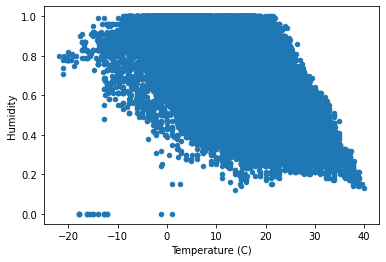

In [4]:
# Plot Temperate vs Humidity 
df_train.plot(x='Temperature (C)', y = 'Humidity', kind='scatter')

# print scatter plot of 

<AxesSubplot:xlabel='Pressure (millibars)', ylabel='Humidity'>

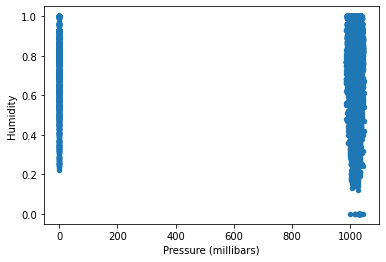

In [5]:
# Pressure vs Humidity
df_train.plot(x = 'Pressure (millibars)', y = 'Humidity', kind='scatter')

<AxesSubplot:xlabel='Summary-code', ylabel='Humidity'>

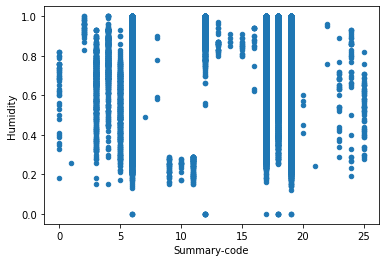

In [6]:
# Summary-code vs Humidity
df_train.plot(x = 'Summary-code', y = 'Humidity', kind='scatter')

Visibility against humidity also had a fairly interesting negative correlation, thought much more weakly correlated than Temperature vs Humidity

<AxesSubplot:xlabel='Visibility (km)', ylabel='Humidity'>

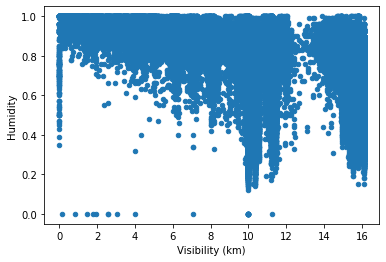

In [7]:
# Visibility vs Humidity
df_train.plot(x="Visibility (km)", y = "Humidity", kind="scatter")

# Model Training
Here the modle was trained using sklearn's learn_model module and it's vectorised LinearRegression function, which handles all of the intricacies. 
## Note to self: y= β0 + β1 * x
- y is the response
- x - is the feature
- β0 -is the intercept
- β1 - is the coefficient for x
- β0 and  β1 - are called the model coefficients

In [8]:
# train model
X = [[x] for x in df_train['Temperature (C)'].values]
Y = [[y] for y in df_train['Humidity'].values]
model = linear_model.LinearRegression()
model.fit(X,Y)
print('model intercept:',model.intercept_)
print('model coeficient:', model.coef_)
print ('A unit increase in Temperature is associated with as',model.coef_[0][0], 'increase in Humidity.')


model intercept: [0.88320342]
model coeficient: [[-0.01289792]]
A unit increase in Temperature is associated with as -0.012897916274269167 increase in Humidity.


# Generate Predictions and compare to Test Set
Here predictions of Humidity are generated based on Temperatures from the 'Test' data set. Comparing the generated humdity predictions against the test set's scatter plot, we can see that the model very closely follows the actual trend seen in the data.

r2 value: [0.39714355]
               X         Y
0       0.072222  0.882272
1       0.355556  0.878617
2       1.138889  0.868514
3       2.222222  0.854541
4       2.916667  0.845585
...          ...       ...
19286  26.016667  0.547643
19287  24.583333  0.566130
19288  22.038889  0.598948
19289  21.522222  0.605612
19290  20.438889  0.619584

[19291 rows x 2 columns]


<AxesSubplot:xlabel='Temperature (C)', ylabel='Humidity'>

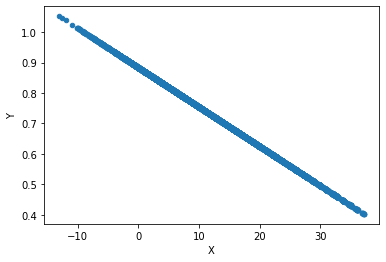

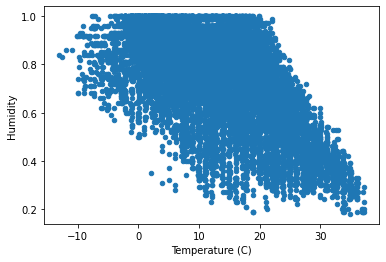

In [9]:
import numpy as np
from r2 import R2
# Test model
# Get Temperature values from test set - for X axis
Xtest = [[x] for x in df_test['Temperature (C)'].values]

# Get predicted Humidity values based on Temperature - for Y axis
Ypred = model.predict(Xtest)

# Get Actual Humidity values - for comparision (i.e. working out the Rsquared value)
Yactual = [[x] for x in df_test['Humidity'].values]

# Work out the Rsquared value
r2 = R2(Yactual=Yactual, Ypred=Ypred)
r2_value = r2.r2()

# Print Rsqures value
print('r2 value:',r2_value)

# convert Predicted Humidity (Ypred) and Temperature values from (test set) to np.array
np_data_y = np.array(Ypred)
np_data_x = np.array(Xtest)

# put Temperature and Predicted Humidity values into pandas dataFrame
df_observe = pd.DataFrame()
df_observe['X'] = pd.DataFrame(data=np_data_x)
df_observe['Y'] = pd.DataFrame(data=np_data_y)

# print the dataframe
print(df_observe)

# Use dataframe to create a scatter plot of Predicted Humidity against Temperatures
df_observe.plot(x='X',y='Y', kind='scatter')

# Plot test set Temperate vs Humidity to compare predicted value to actual values
df_test.plot(x='Temperature (C)', y = 'Humidity', kind='scatter')

# Then compare to the scatter graphs to visually see how closely the model matches the actual trend